# 2. Visualizing Each Step of K-Means

####  Add code in the plot_k_means(...) from the previous file

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from  k_means_functions import get_simple_data


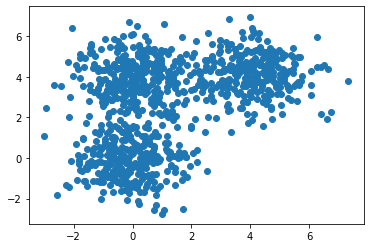

In [6]:
X = get_simple_data()
plt.scatter(X[:,0],X[:,1] )
plt.show()

In [7]:
#Calculate distance (d)
#2
def d(u, v):
    diff = u - v
    return diff.dot(diff)

#3
def cost(X, R, M):
    cost = 0
    for k in range(len(M)):
        # method 1
        # for n in range(len(X)):
        #     cost += R[n,k]*d(M[k], X[n])

        # method 2
        diff = X - M[k]
        sq_distances = (diff * diff).sum(axis=1)
        cost += (R[:,k] * sq_distances).sum()
    return cost

#1
def plot_k_means(X, K, max_iter = 20, beta = 1.0, show_plots=False):
    N, D = X.shape
    # R = np.zeros((N, K))
    exponents = np.empty((N, K))

    # initialize M to random
    initial_centers = np.random.choice(N, K, replace=False)
    M = X[initial_centers]
    
# Add this code for visualizinn each stap of K-Means
#---------- N, D = X.shape
  
    R = np.ones((N, K)) / K
    
    grid_width = 5
    grid_height = max_iter / grid_width
    
    # 3 columns - > RGB
    random_colors = np.random.random((K, 3))
    plt.figure()  
    
#----------------------------------------------------------------------------------------------------------------------- 
    costs = []
    k = 0
    for i in range(max_iter):
        
        # Add this code for visualizinn each stap of K-Means
#-----------------------------------------------------------------------------------------------------------------------    
        colors = R.dot(random_colors)
        plt.subplot(grid_width, grid_height, i+1)
        plt.scatter(X[:,0], X[:,1], c=colors)
        
#-----------------------------------------------------------------------------------------------------------------------     
        k += 1
        
        # step 1: determine assignments / resposibilities
        # is this inefficient?
        for k in range(K):
            for n in range(N):
                exponents[n,k] = np.exp(-beta*d(M[k], X[n]))
        R = exponents / exponents.sum(axis=1, keepdims=True)


        # step 2: recalculate means
        # decent vectorization
        # for k in range(K):
        #     M[k] = R[:,k].dot(X) / R[:,k].sum()
        # oldM = M

        # full vectorization
        M = R.T.dot(X) / R.sum(axis=0, keepdims=True).T
        # print("diff M:", np.abs(M - oldM).sum())

        c = cost(X, R, M)
        costs.append(c)
        if i > 0:
            if np.abs(costs[-1] - costs[-2]) < 1e-5:
                break

        if len(costs) > 1:
            if costs[-1] > costs[-2]:
                pass
                # print("cost increased!")
                # print("M:", M)
                # print("R.min:", R.min(), "R.max:", R.max())

        
    if show_plots:

        fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(6,8))
        axes[0].plot(costs)
        axes[0].set_title("Costs")
        
        
        # Comment this code 
#-----------------------------------------------------------------------------------------------------------------------    
 
#         random_colors = np.random.random((K, 3))
#         colors = R.dot(random_colors)
        
#-----------------------------------------------------------------------------------------------------------------------     


        axes[1].scatter(X[:,0], X[:,1], c=colors)


    print("Final cost", costs[-1])
    
    return M, R
 

Final cost 1754.0811484342591


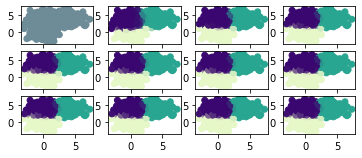

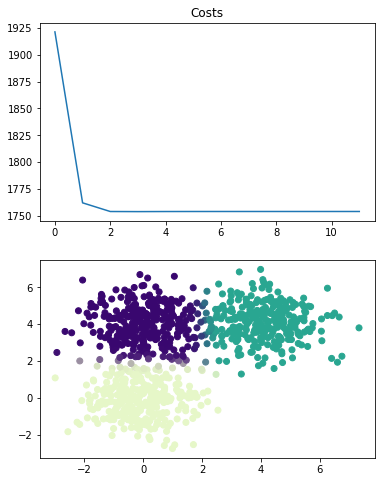

In [9]:
K = 3 # luckily, we already know this
_, _ = plot_k_means(X, K, beta=1.0, show_plots=True)

Final cost 1739.6054935596717


(array([[ 4.07578423,  4.0158854 ],
        [-0.08731557,  4.0621533 ],
        [ 0.13628065,  0.07671753]]),
 array([[9.87924958e-33, 2.83972358e-31, 1.00000000e+00],
        [2.41208955e-03, 7.82549784e-09, 9.97587903e-01],
        [8.68713199e-56, 1.63170283e-27, 1.00000000e+00],
        ...,
        [7.06005736e-25, 1.00000000e+00, 2.02988784e-15],
        [2.23713367e-09, 9.99999998e-01, 1.98341978e-21],
        [2.23047382e-21, 9.99999999e-01, 1.41790481e-09]]))

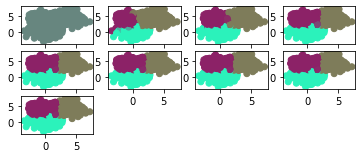

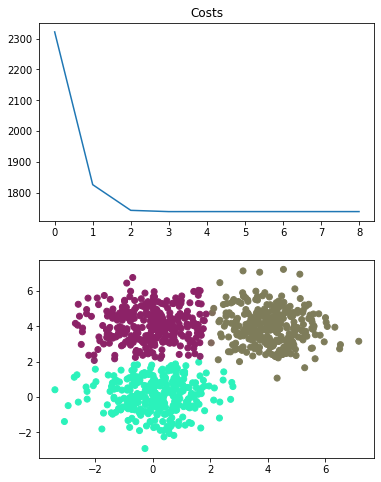

In [118]:
K = 3 # luckily, we already know this
plot_k_means(X, K, beta=3.0, show_plots=True)

Final cost 1739.035823577598


(array([[-0.09013829,  4.06140471],
        [ 4.07340851,  4.01569076],
        [ 0.13662198,  0.07551066]]),
 array([[1.40836850e-102, 2.27406675e-107, 1.00000000e+000],
        [8.77964429e-028, 2.10297814e-009, 9.99999998e-001],
        [5.60642097e-090, 3.66622062e-184, 1.00000000e+000],
        ...,
        [1.00000000e+000, 3.78813809e-081, 9.56538892e-050],
        [1.00000000e+000, 1.80628743e-029, 9.63881895e-070],
        [1.00000000e+000, 1.74714383e-069, 2.96588597e-030]]))

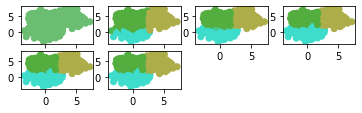

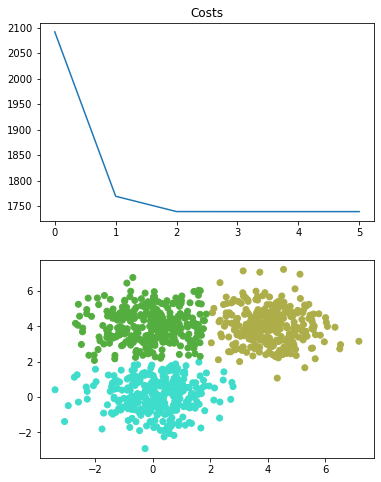

In [119]:
K = 3 # luckily, we already know this
plot_k_means(X, K, beta=10.0, show_plots=True)

Final cost 1455.0401723975513


(array([[ 4.49032819,  3.53498949],
        [-0.1663219 ,  4.14316169],
        [ 0.18022993,  1.02672211],
        [ 0.0847929 , -0.54375463],
        [ 3.43206066,  4.61052766]]),
 array([[1.23470518e-10, 1.26005384e-11, 5.32232829e-02, 9.46776717e-01,
         3.64001313e-13],
        [4.17078537e-02, 1.25343675e-04, 9.39980434e-01, 1.48291289e-02,
         3.35723975e-03],
        [2.68955930e-19, 3.52184814e-10, 6.73514085e-02, 9.32648591e-01,
         2.42163240e-19],
        ...,
        [3.02904528e-10, 9.96595170e-01, 3.40406928e-03, 1.43645264e-07,
         6.16287847e-07],
        [8.52537262e-05, 9.65907929e-01, 1.45862458e-04, 5.96480642e-10,
         3.38609542e-02],
        [9.97368768e-09, 8.87395463e-01, 1.12576467e-01, 2.48431946e-05,
         3.21714871e-06]]))

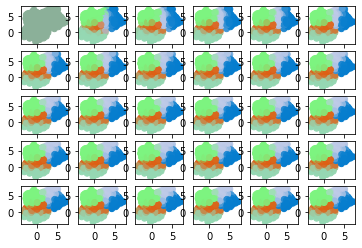

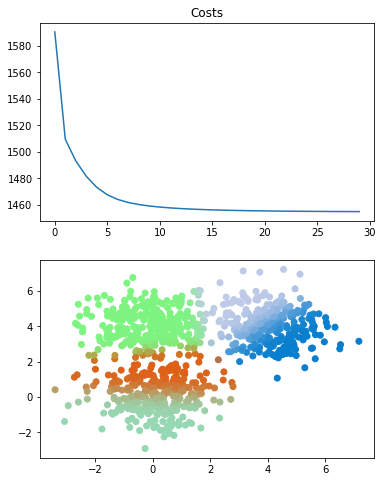

In [120]:
K = 5 # what happens if we choose a "bad" K?
plot_k_means(X, K, max_iter=30, show_plots=True)

Final cost 2151.5761210083633


(array([[ 3.96795166,  3.99992232],
        [-0.04749758,  3.87449897],
        [ 0.12452658, -0.00650899],
        [-0.03910464,  3.69780944],
        [ 3.96800764,  3.99989732]]),
 array([[7.35830934e-04, 1.49317976e-03, 9.94497466e-01, 2.53769506e-03,
         7.35828482e-04],
        [2.32999392e-01, 8.14005119e-02, 3.44576195e-01, 1.08028510e-01,
         2.32995391e-01],
        [4.22364404e-06, 3.23658210e-03, 9.91464392e-01, 5.29057874e-03,
         4.22312607e-06],
        ...,
        [2.33565748e-03, 4.82494981e-01, 1.31426879e-02, 4.99691447e-01,
         2.33522616e-03],
        [7.03015491e-02, 4.35169861e-01, 2.95486581e-03, 4.21281409e-01,
         7.02923151e-02],
        [4.48755315e-03, 4.49575674e-01, 4.51094562e-02, 4.96340476e-01,
         4.48684021e-03]]))

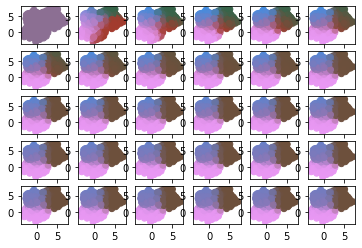

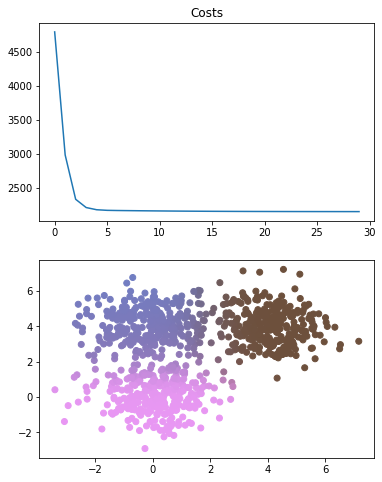

In [121]:
K = 5 # what happens if we change beta?
plot_k_means(X, K, max_iter=30, beta=0.3, show_plots=True)

In [1]:
# อย่าลืมนำเอาfunction ไปรวมไว้ในไฟล์ k_means_functions.py